In [1]:
import json
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
user_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/users.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    user_set.update(loaded[0].keys())

In [3]:
user_set

{'color',
 'deleted',
 'id',
 'is_admin',
 'is_app_user',
 'is_bot',
 'is_owner',
 'is_primary_owner',
 'is_restricted',
 'is_ultra_restricted',
 'name',
 'profile',
 'real_name',
 'team_id',
 'tz',
 'tz_label',
 'tz_offset',
 'updated'}

In [4]:
channels_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    channels_set.update(loaded[0].keys())

In [5]:
channels_set

{'created',
 'creator',
 'id',
 'is_archived',
 'is_general',
 'members',
 'name',
 'pins',
 'purpose',
 'topic'}

## Memebership graph

In [6]:
def static_graph_builder(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_node(i['name'], role='room')
            G.add_nodes_from(i['members'], role='users')
            for j in i['members']:
                G.add_edge(i['name'], j)
    return G

In [7]:
G = static_graph_builder('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [8]:
G.number_of_nodes()

54639

In [9]:
G.number_of_edges()

1062962

In [10]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 54639\nNumber of edges: 1062962\nAverage degree:  38.9085'

In [11]:
if nx.is_connected(G):
    print('Граф является ненаправленным и связным.')
else:
    print('Граф является ненаправленным и состоит из нескольких компонент.')

Граф является ненаправленным и состоит из нескольких компонент.


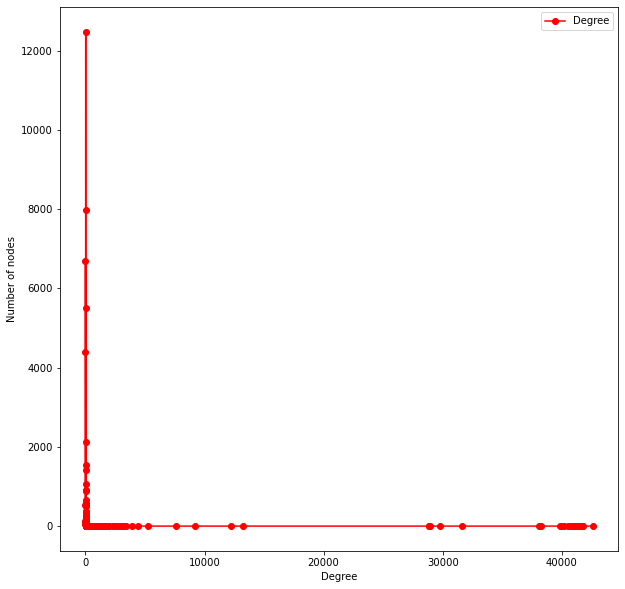

In [12]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [21]:
def static_graph_builder_user_to_user(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_nodes_from(i['members'])
            for j in i['members']:
                for k in i['members']:
                    if j != k:
                        G.add_edge(j, k)
    return G

In [ ]:
G_us = static_graph_builder_user_to_user('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [ ]:
nx.info(G_us)

In [13]:
def static_graph_builder_channel_to_channel(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    for k in s:
                        G.add_edge(i['name'], j['name'], k)
    return G

In [ ]:
G_ch = static_graph_builder_channel_to_channel('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [18]:
def static_graph_weighted(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    G.add_edge(i['name'], j['name'], weight=len(s))
    return G

In [20]:
G_w = static_graph_weighted('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [21]:
nx.info(G_w)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 66795\nAverage degree: 365.0000'

In [28]:
from itertools import product

def static_graph_weighted2(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read()) 
        namelist = [i['name'] for i in loaded]
        G.add_nodes_from(namelist)
        print([(i1, i2) for i1, i2 in product(namelist, namelist) if i1 != i2])
#         for i in loaded:
#             G.add_node(i['name'])
#             for j in loaded:
#                 G.add_node(j['name'])
#                 if i != j:
#                     s = set(i['members'])
#                     s.update(set(j['members']))
#                     G.add_edge(i['name'], j['name'], weight=len(s))
    return G



In [29]:
G_w2 = static_graph_weighted2('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Node list

In [ ]:
path_ = 'data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020'
_s_set = set()

In [ ]:
def sourcer(path_, _s_set, _prefix=''):
    names = os.listdir(path_)
    s_path = os.path.realpath(path_)

    for name in names:
        fullpath = os.path.join(s_path, name)
        if os.path.isfile(fullpath):
            if os.path.splitext(fullpath)[1] == '.json':
                with open(fullpath, 'r') as file_open:
                    loaded = json.loads(file_open.read())
                    _s_set.update(loaded[0].keys())
        elif os.path.isdir(fullpath):
            sourcer(os.path.join(path_, name), _s_set, _prefix + name + '/')

    return _s_set

In [ ]:
s = sourcer(path_, _s_set)

In [ ]:
s